<a href="https://colab.research.google.com/github/parveen180/ML-/blob/main/Building_LassoRegression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lasso Regression

y=wx+b

gradient descent

w=w -a*dw

b=b-a*db

if(wj>0)

(dj/dw)=-2/m [[( Σmi=1 xj(y-yi^)+λ]]

if(wj<0)

(dj/dw)=-2/m [[( Σmi=1 xj(y-yi^)-λ]]

(dj/db)=-2/m [[( Σmi=1 (y-yi^)]]

In [59]:
import numpy as np

In [60]:
# creating a class for Lasso Regression

class Lasso_Regression():

  #initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  # fitting the dataset to the Lasso Regression model
  def fit(self, X, Y):

    # m --> number of Data points --> number of rows
    # n --> number of input features --> number of columns
    self.m, self.n = X.shape

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):     # missed "self"
      self.upadte_weights()


  # function for updating the weight & bias value
  def upadte_weights(self):

    # linear equation of the model
    Y_prediction = self.predict(self.X)

    # gradients (dw, db)

    # gradient for weight
    dw = np.zeros(self.n)

    for i in range(self.n):

      if self.w[i]>0:

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m

      else :

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m


    # gradient for bias
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m


    # updating the weights & bias

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db




  # Predicting the Target variable
  def predict(self,X):

    return X.dot(self.w) + self.b




In [61]:
model=Lasso_Regression(learning_rate=0.01,no_of_iterations=1000,lambda_parameter=0.1)

In [62]:
import pandas as pd

In [63]:
dataset=pd.read_csv('Salary_Data.csv')
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [65]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [67]:
regressor=Lasso_Regression(learning_rate=0.01,no_of_iterations=1000,lambda_parameter=0.1)

In [68]:
regressor.fit(x_train, y_train)

In [69]:
# Make predictions on the train data
x_train_pred = regressor.predict(x_train)

In [71]:
print(x_train_pred)

[116180.80937106  64030.40041966  76136.7453548  100349.4352251
  53786.57008992  74274.2307494   56580.34199803  68686.68693318
 103143.20713321  90105.60489536  38886.45324666 124562.12509539
  54717.82739262  47267.76897099  81724.28917103  82655.54647373
  61236.62851155  56580.34199803 110593.26555484  45405.25436559
  37023.93864126  92899.37680347  72411.71614399  64030.40041966]


In [70]:
# Make predictions on the test data
x_test_pred = regressor.predict(x_test)

In [72]:
print(x_test_pred)

[ 40748.96785207 122699.61048998  64961.65772236  63099.14311695
 115249.55206835 107799.49364673]


In [73]:
import matplotlib.pyplot as plt

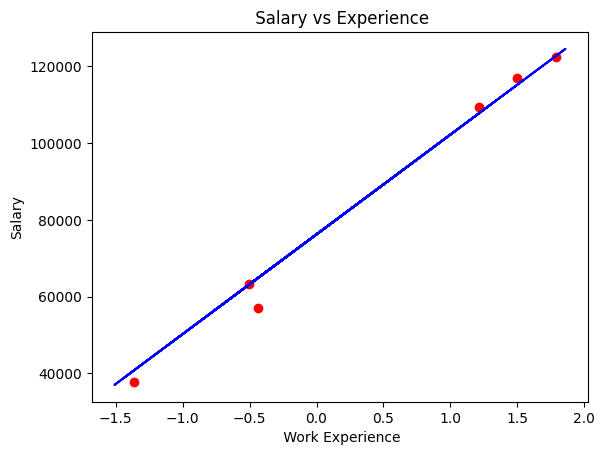

In [76]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, x_train_pred, color='blue')
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')
plt.show()